In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("/Users/saraasadi/Desktop/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [35]:
print(df.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [36]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
# Spliting the data into features (X) and target variable (y)
X = df.drop('output', axis=1)
y = df['output']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
rf_classifier = RandomForestClassifier(random_state=22)

In [8]:
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=22)

In [9]:
y_pred = rf_classifier.predict(X_test_scaled)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7377049180327869


In [38]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [39]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [40]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_log_reg)

Logistic Regression Accuracy: 0.7704918032786885


In [41]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73        29
           1       0.74      0.88      0.80        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [42]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [17]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


In [19]:
results_df = pd.DataFrame(results).transpose()
print(results_df)

                        Accuracy  Precision   Recall  F1 Score
Logistic Regression     0.770492   0.736842  0.87500  0.800000
Random Forest           0.737705   0.750000  0.75000  0.750000
Support Vector Machine  0.770492   0.781250  0.78125  0.781250
Gradient Boosting       0.721311   0.714286  0.78125  0.746269
K-Nearest Neighbors     0.786885   0.771429  0.84375  0.805970
Naive Bayes             0.770492   0.764706  0.81250  0.787879


In [20]:
params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9]},
    'Naive Bayes': {}
}


In [21]:
results = {}
for name, model in models.items():
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {'Best Parameters': grid_search.best_params_, 'Accuracy': accuracy}
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {'Accuracy': accuracy}

results_df = pd.DataFrame(results).transpose()
print(results_df)

                                                          Best Parameters  \
Logistic Regression                                            {'C': 100}   
Random Forest                       {'max_depth': 5, 'n_estimators': 200}   
Support Vector Machine            {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}   
Gradient Boosting       {'learning_rate': 0.01, 'max_depth': 3, 'n_est...   
K-Nearest Neighbors                                    {'n_neighbors': 9}   
Naive Bayes                                                            {}   

                        Accuracy  
Logistic Regression     0.770492  
Random Forest           0.754098  
Support Vector Machine  0.770492  
Gradient Boosting       0.754098  
K-Nearest Neighbors     0.803279  
Naive Bayes             0.770492  


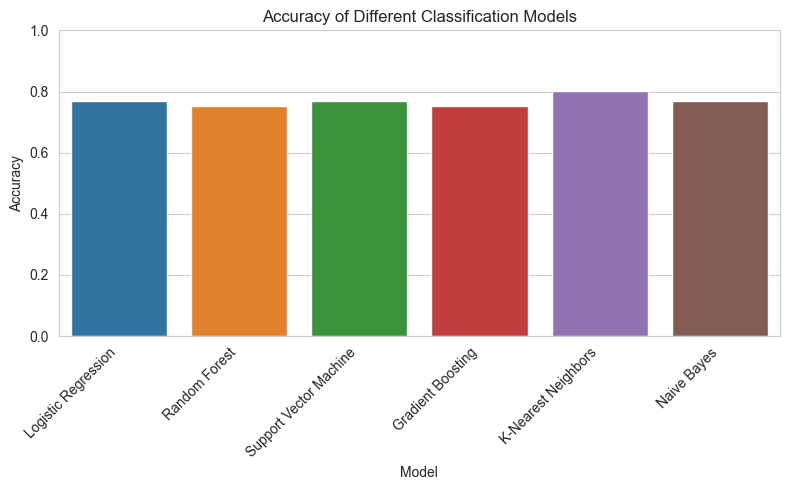

In [22]:
# Set the style
sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], hue=results_df.index, dodge=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0.0, 1.0)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend([], frameon=False)  # Hide the legend
plt.tight_layout()
plt.show()


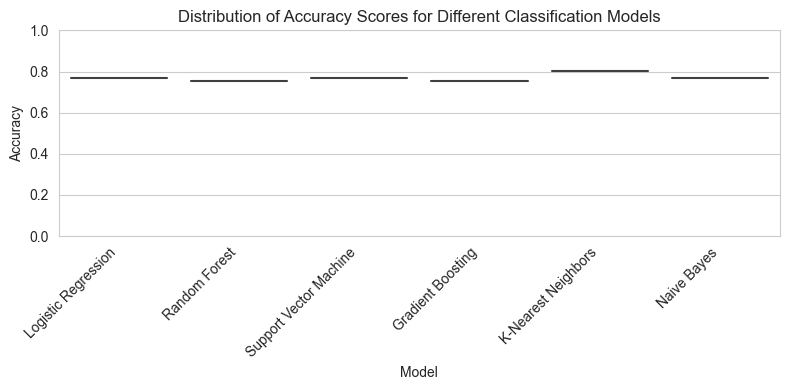

In [23]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=results_df.index, y=results_df['Accuracy'], inner="quart", linewidth=1.5)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Distribution of Accuracy Scores for Different Classification Models')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

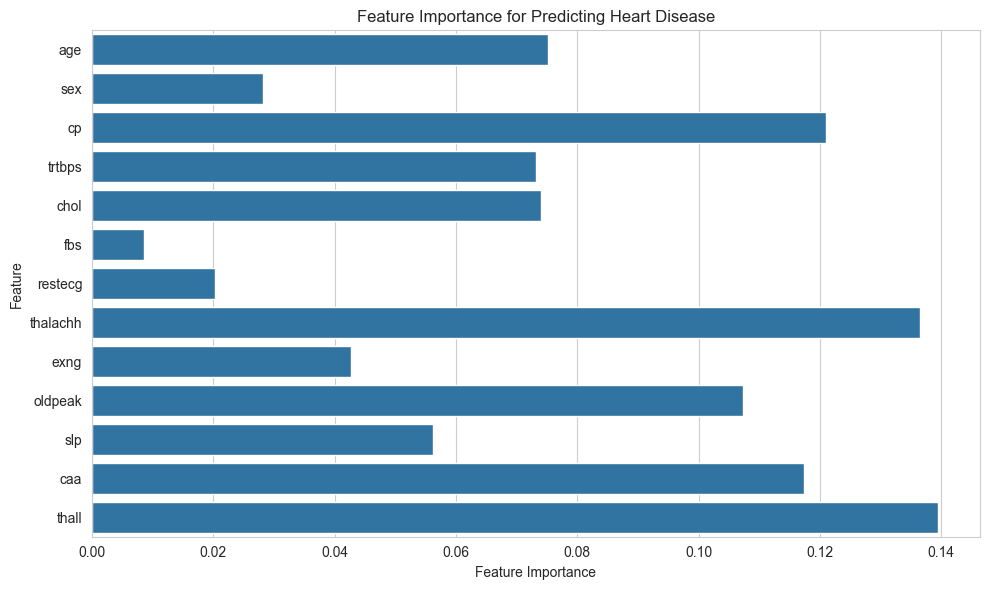

In [24]:
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Heart Disease')
plt.tight_layout()
plt.show()

In [25]:
metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score}
results_comparison = {}
for name, model in models.items():
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    model_results = {metric_name: metric_func(y_test, y_pred) for metric_name, metric_func in metrics.items()}
    results_comparison[name] = model_results

comparison_df = pd.DataFrame(results_comparison).transpose()
print(comparison_df)

                        Accuracy  Precision   Recall  F1 Score
Logistic Regression     0.770492   0.736842  0.87500  0.800000
Random Forest           0.770492   0.781250  0.78125  0.781250
Support Vector Machine  0.770492   0.781250  0.78125  0.781250
Gradient Boosting       0.754098   0.729730  0.84375  0.782609
K-Nearest Neighbors     0.803279   0.794118  0.84375  0.818182
Naive Bayes             0.770492   0.764706  0.81250  0.787879


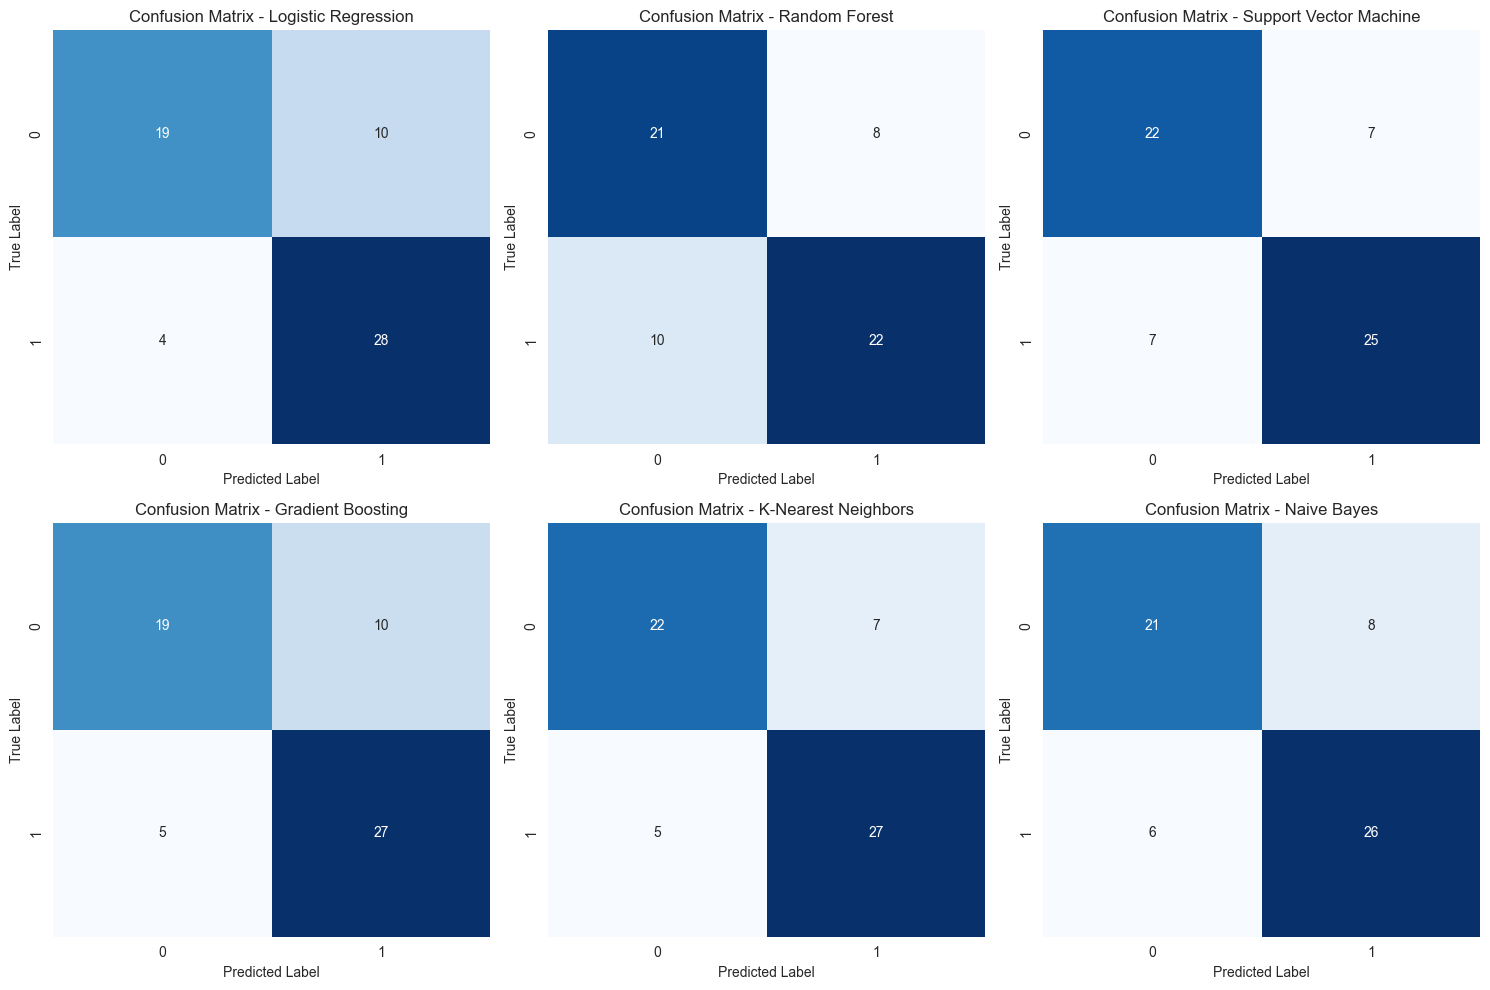

In [26]:
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [33]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('log_reg', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_model.fit(X_train_scaled, y_train)

stacking_accuracy = accuracy_score(y_test, stacking_model.predict(X_test_scaled))
print("Stacking Model Accuracy:", stacking_accuracy)


Stacking Model Accuracy: 0.7868852459016393
